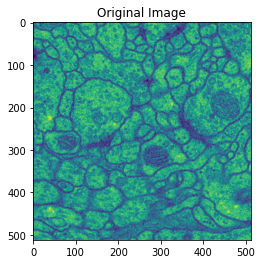

Computation Time = 456.1129816


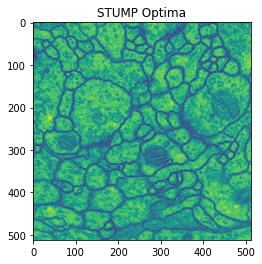

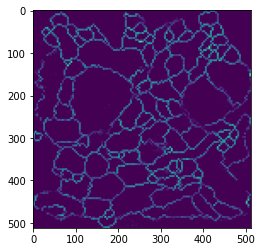

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import topnet
import imageio

#Data can be accessed at http://brainiac2.mit.edu/isbi_challenge/home

if __name__ == '__main__':
    # Grab and normalize blobs image.
    f = np.asarray(imageio.imread('isbi12/images/train-volume01.jpg')[:600, :600], dtype=np.float32)
    f -= f.min()
    f /= f.max()
    f *= 255
    plt.figure()
    plt.title('Original Image')
    plt.imshow(f)
    plt.show()
    # Parameters
    hom_dim = 1
    card = 10000
    bad_pers = [float('-inf'), float('inf'),70,float('inf')]
    lr = 5e-2
    a = (1 - 1 / np.prod(f.shape))
    steps = 5000
    kernel_size = 4
    eps = 20
    pool_mode = 'simplex'


    def update_func(grad_dgm, dgm, cof, x):
        bsm, dsm = topnet.compute_dgm_grad(grad_dgm, cof, x)
        return bsm

    def SpawnTopLoss(x):
        x_noisy = topnet.UniformNoise(x, eps)
        x_down = topnet.Spool(x_noisy, kernel_size, pool_mode)[0]
        dgm = topnet.Cubical(x_down, card, hom_dim, update_func)[0]
        bad_top = -1*topnet.AbsPersInRegion(dgm, bad_pers)
        return bad_top


    spawn_optima = topnet.TopBackprop(f, SpawnTopLoss, a, lr, steps)
    plt.figure()
    plt.title('STUMP Optima')
    plt.imshow(spawn_optima)
    plt.show()

    plt.imshow(f-spawn_optima)

    def VanillaTopLoss(x):
        dgm = topnet.Cubical(x, card, hom_dim, update_func)[0]
        bad_top = topnet.SqPersInRegion(dgm, bad_pers)
        return bad_top
